# Demo for kidney segmentation
First the km_dict.cpp file must be compiled to your system. Using gcc, this is done by the command:
`g++ -fPIC -shared -Ofast -o km_dict_lib.so km_dict.cpp` or alternatively `g++ -fPIC -shared -O3 -o km_dict_lib.so km_dict.cpp`.

The next step is to load the necessary modules.

In [1]:
import insegtpy
import insegtpy.models
import skimage.io
import matplotlib.pyplot as plt
import PIL
import numpy as np
%matplotlib inline 
%matplotlib notebook

<IPython.core.display.Javascript object>


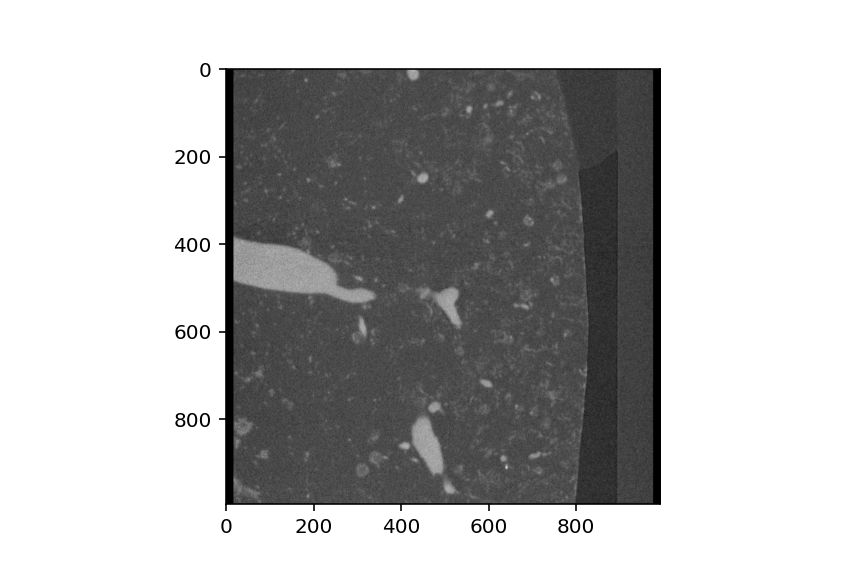

In [2]:
#%% Load image from tiff stack
image_train = (np.minimum(skimage.io.imread('/Users/abda/Documents/Center/QIM/data/Rat_kidney/'
            'Rat_37_zoom/RAT 37 - 20-05-21 - RAT 38 - 20-05-21_RAT 38-40kV-5microA_recon.tiff')[:,400,:]/255,255)).astype(np.uint8) # change data type from uint16 to uint8

plt.figure()
plt.imshow(image_train, cmap='gray')
plt.show()

In [5]:
#%% Build the model

model = insegtpy.models.gauss_features_segmentor(image_train, 
                                   branching_factor = 25, 
                                   number_layers = 3,
                                   number_training_vectors = 200000,
                                   features_sigma = [1,2,4,8],
                                   propagation_size = 9, 
                                   scales=[1, 0.5, 0.25])


Bulding multi-scale GaussFeatSegt model.
Number of images 1
Number of training patches 200000
Number of layers 3 number of elements 16275
Number of images 1
Number of training patches 200000
Number of layers 3 number of elements 16275
Number of images 1
Number of training patches 61504
Number of layers 3 number of elements 16275


<IPython.core.display.Javascript object>


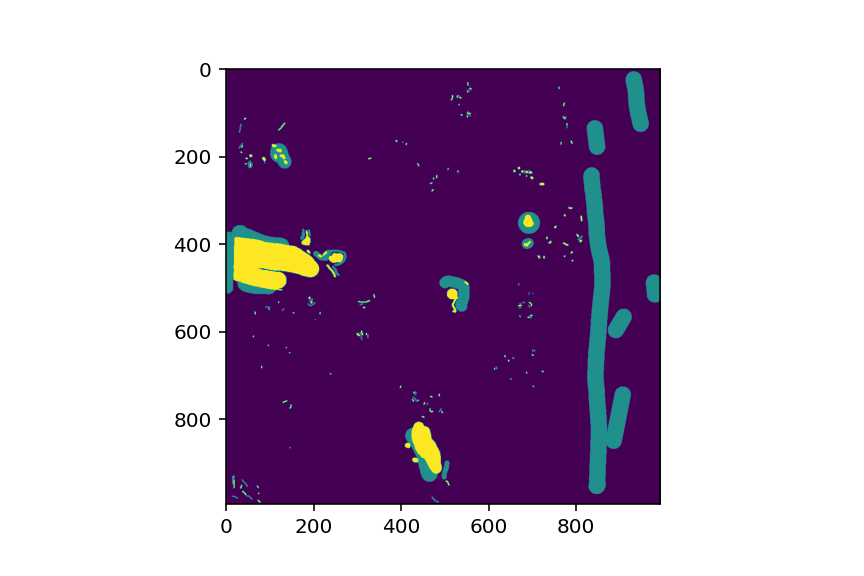

In [7]:
#%% Train on already annotated image

labels = np.array(PIL.Image.open('/Users/abda/Documents/Center/QIM/data/Rat_kidney/Rat_37_zoom/training/annotations_index.png'))//30
plt.figure()
plt.imshow(labels)
plt.show()

prob_image_train = model.process(labels)



<IPython.core.display.Javascript object>


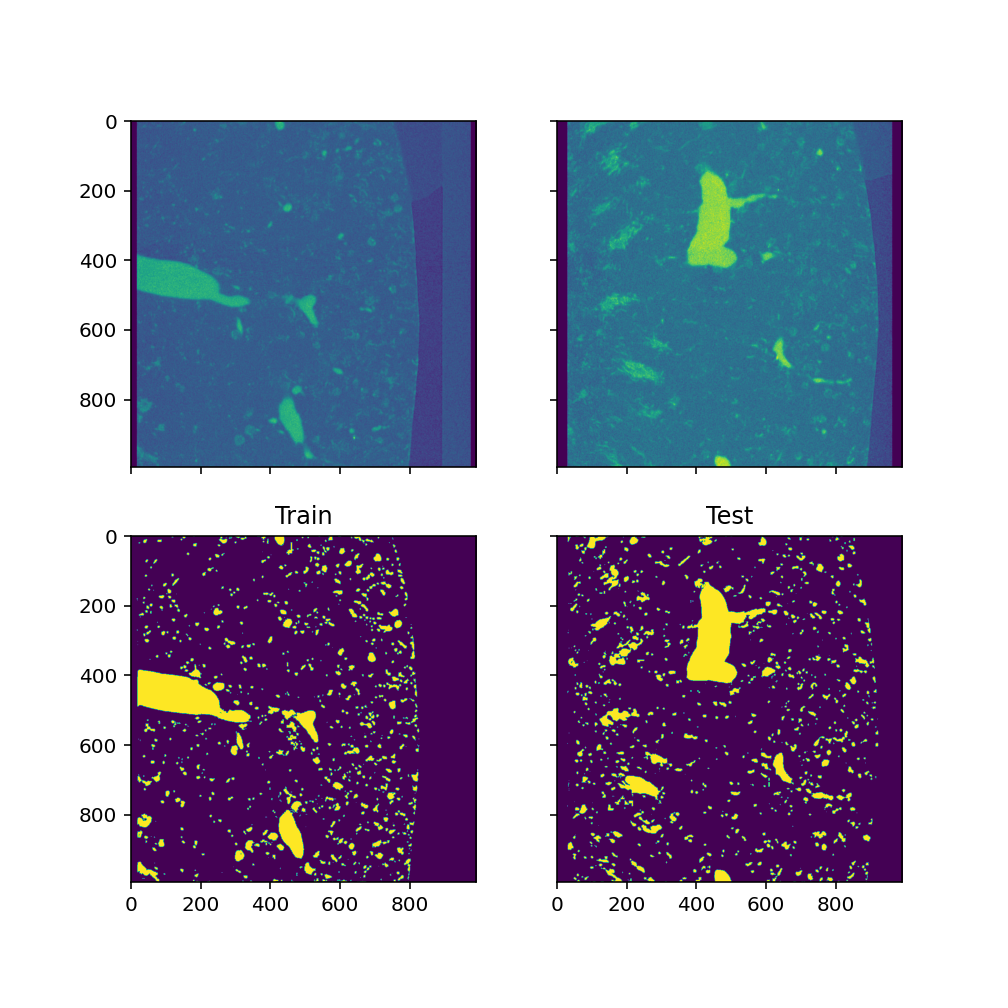

In [8]:
#%% Compute probabilities for the training image and the test image and display

#prob_image_train = model.segment_new(image_train)
seg_image_train = insegtpy.utils.segment_probabilities(prob_image_train)

image_test = (np.minimum(skimage.io.imread('/Users/abda/Documents/Center/QIM/data/Rat_kidney/'
            'Rat_37_zoom/RAT 37 - 20-05-21 - RAT 38 - 20-05-21_RAT 38-40kV-5microA_recon.tiff')[:,660,:]/255,255)).astype(np.uint8) # change data type from uint16 to uint8



prob_image_test = model.segment_new(image_test)
seg_image_test = insegtpy.utils.segment_probabilities(prob_image_test)

fig, ax = plt.subplots(2, 2, sharex = True, sharey = True, figsize=(7,7))
ax[0][0].imshow(image_train)
ax[1][0].imshow(seg_image_train)
ax[1][0].set_title('Train')
ax[0][1].imshow(image_test)
ax[1][1].imshow(seg_image_test)
ax[1][1].set_title('Test')
plt.show()

In [9]:
#%% Interactive training

# Data can be saved by pressing 's'. The annotator will save data to the 
# current working directory. Instead the annotations can also be saved by 
# running the script below.

model.propagation_repetitions = 2

ex = insegtpy.insegt(image_train, model, saveAddress='/Users/abda/Documents/Center/QIM/data/Rat_kidney/Rat_37_zoom/training/test') # Opens a window for annotation


Starting InSegt Annotator. For help, hit 'H'.
/Users/abda/Documents/Center/QIM/data/Rat_kidney/Rat_37_zoom/training/test/
